# Classification Experiment

## [The AI Lab][1]

A simple classification experiment intended to be a light introduction to AI and machine learning.

[1]: <https://www.youtube.com/playlist?list=PLybfE53k5nNqZgJv0ZAxuDxVZ1-vFMhdl>

## Import Libraries

In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Model Parameters and Functions

In [2]:
classA = 'cat'
classB = 'dog'

imageSetPath = 'data/cats-and-dogs/'

train_path = imageSetPath + 'train'
valid_path = imageSetPath + 'valid'
test_path  = imageSetPath + 'test'

epochs = 20

In [3]:
# plots images with labels within jupyter notebook
def plots(ims, classA, classB, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
        f = plt.figure(figsize=figsize)
        cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
        for i in range(len(ims)):
            sp = f.add_subplot(rows, cols, i+1)
            sp.axis('Off')
            if titles is not None:
                title = classA if np.argmax(titles[i]) == 0 else classB
                sp.set_title(title, fontsize=16)
            plt.imshow(ims[i], interpolation=None if interp else 'none')

In [4]:
def get_accuracy(labels, predictions):
    corrects = 0
    for i in range(len(predictions)):
        if np.argmax(predictions[i]) == np.argmax(labels[i]):
            corrects = corrects + 1

    accuracy = corrects / len(predictions) * 100
    return accuracy

In [5]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=[classA, classB], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=[classA, classB], batch_size=5)
test_batches  = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=[classA, classB], batch_size=5)

Found 40 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


## Build and Train Model

### Build Model

In [6]:
# get vgg16 model
vgg16_model = keras.applications.vgg16.VGG16()

In [7]:
# clone model but with custom output
model = Sequential()

for layer in vgg16_model.layers:
    model.add(layer)

model.layers.pop()
for layer in model.layers:
    # do not update these layer's weights during training
    layer.trainable = False
    
model.add(Dense(2, activation='softmax'))

model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

#### Predictions Before Training

Accuracy: 60.0 %


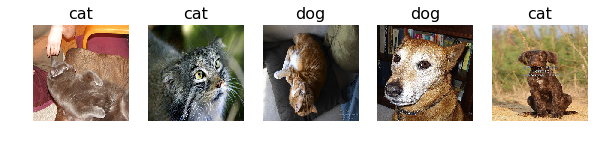

In [ ]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
imgs, labels = next(test_batches)

accuracy = get_accuracy(labels, predictions)
plots(imgs, classA, classB, titles=predictions)
print('Accuracy:', accuracy, '%')

### Train Model

In [ ]:
# train model
model.fit_generator(train_batches, steps_per_epoch=4, validation_data=valid_batches, 
                    validation_steps=4, epochs=epochs, verbose=2)

Epoch 1/20
 - 40s - loss: 0.6941 - acc: 0.5000 - val_loss: 0.6936 - val_acc: 0.4375
Epoch 2/20
 - 40s - loss: 0.6939 - acc: 0.5250 - val_loss: 0.6934 - val_acc: 0.4375
Epoch 3/20
 - 48s - loss: 0.6937 - acc: 0.5250 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 4/20
 - 40s - loss: 0.6936 - acc: 0.5250 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 5/20
 - 43s - loss: 0.6934 - acc: 0.5250 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/20
 - 41s - loss: 0.6932 - acc: 0.5250 - val_loss: 0.6929 - val_acc: 0.5000
Epoch 7/20
 - 42s - loss: 0.6930 - acc: 0.5250 - val_loss: 0.6928 - val_acc: 0.5625
Epoch 8/20
 - 40s - loss: 0.6928 - acc: 0.5250 - val_loss: 0.6927 - val_acc: 0.5625
Epoch 9/20
 - 40s - loss: 0.6927 - acc: 0.5250 - val_loss: 0.6926 - val_acc: 0.5625
Epoch 10/20
 - 38s - loss: 0.6925 - acc: 0.5250 - val_loss: 0.6924 - val_acc: 0.5625
Epoch 11/20
 - 38s - loss: 0.6923 - acc: 0.5250 - val_loss: 0.6923 - val_acc: 0.5625
Epoch 12/20
 - 39s - loss: 0.6921 - acc: 0.5500 - val_loss: 0.6922 - val_a

## Predictions After Training

In [ ]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
imgs, labels = next(test_batches)

accuracy = get_accuracy(labels, predictions)
plots(imgs, classA, classB, titles=predictions)
print('Accuracy:', accuracy, '%')